# GPU setup

In [1]:
import tensorflow as tf
from tensorflow import keras
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
tf.test.is_built_with_cuda()
print(tf.version.VERSION)
import sys
sys.version

Num GPUs Available:  1
2.10.0


'3.9.16 (main, Mar  8 2023, 10:39:24) [MSC v.1916 64 bit (AMD64)]'

# Importing Libraries

In [102]:
import pandas as pd
import numpy as np 
import os
import shutil
import glob
import sys
import random
from random import seed
import math
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.utils import resample
from sklearn.metrics import roc_curve, confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization, Conv2D, GlobalAveragePooling2D, BatchNormalization, Average, PReLU, Input
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

In [3]:
df_train =pd.read_csv("C:/Users/MartinDesktop/Documents/Oslomet Master 1.2/ACIT4630/dataset/melanoma256new/train.csv")
df_train.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target,tfrecord,width,height
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0,0,6000,4000
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0,0,6000,4000
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0,6,1872,1053
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0,0,1872,1053
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0,11,6000,4000


# Oversampling the malignant class 

In [4]:
# Separate data by class
majority_data = df_train[df_train['target'] == 0]  # Assuming 'target' column represents the class labels
minority_data = df_train[df_train['target'] == 1]

# Determine desired number of samples
desired_samples = 2584

# Randomly oversample the malignant class
oversampled_minority_data = resample(minority_data, replace=True, n_samples=desired_samples, random_state=42)

# Combine the benign class data with the oversampled malignant class data
oversampled_data = pd.concat([majority_data, oversampled_minority_data])

# Convert oversampled_data DataFrame to CSV
oversampled_data.to_csv('C:/Users/MartinDesktop/Documents/Oslomet Master 1.2/ACIT4630/dataset/melanoma256new/oversampled_data.csv', index=False)


In [5]:
df_oversampled = pd.read_csv('C:/Users/MartinDesktop/Documents/Oslomet Master 1.2/ACIT4630/dataset/melanoma256new/oversampled_data.csv')
df_oversampled.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target,tfrecord,width,height
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0,0,6000,4000
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0,0,6000,4000
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0,6,1872,1053
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0,0,1872,1053
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0,11,6000,4000


In [6]:
# Calculating the number of benign/malignant images
benign = len(df_oversampled[df_oversampled["target"] == 0])
malignant = len(df_oversampled[df_oversampled["target"] == 1])
total = len(df_oversampled) 

print("Number of benign images = ",benign)
print("Number of malignant images = ", malignant)
print("Number of images in total = ",total)
print("The ratio of malignant to benign = ",malignant/benign)

Number of benign images =  32542
Number of malignant images =  2584
Number of images in total =  35126
The ratio of malignant to benign =  0.07940507651650175


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33126 entries, 0 to 33125
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   image_name                     33126 non-null  object 
 1   patient_id                     33126 non-null  object 
 2   sex                            33061 non-null  object 
 3   age_approx                     33058 non-null  float64
 4   anatom_site_general_challenge  32599 non-null  object 
 5   diagnosis                      33126 non-null  object 
 6   benign_malignant               33126 non-null  object 
 7   target                         33126 non-null  int64  
 8   tfrecord                       33126 non-null  int64  
 9   width                          33126 non-null  int64  
 10  height                         33126 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 2.8+ MB


In [8]:
df_oversampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35126 entries, 0 to 35125
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   image_name                     35126 non-null  object 
 1   patient_id                     35126 non-null  object 
 2   sex                            35061 non-null  object 
 3   age_approx                     35058 non-null  float64
 4   anatom_site_general_challenge  34573 non-null  object 
 5   diagnosis                      35126 non-null  object 
 6   benign_malignant               35126 non-null  object 
 7   target                         35126 non-null  int64  
 8   tfrecord                       35126 non-null  int64  
 9   width                          35126 non-null  int64  
 10  height                         35126 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 2.9+ MB


# Setting up the global parameters

In [9]:
# Creating a config class for all configurations

class configs:
    # Paths for directory and tabular data
    
    base_dir = 'C:/Users/MartinDesktop/Documents/Oslomet Master 1.2/ACIT4630/dataset/melanoma256new/'
    train_dir = 'C:/Users/MartinDesktop/Documents/Oslomet Master 1.2/ACIT4630/dataset/melanoma256new/train/'
    test_dir = 'C:/Users/MartinDesktop/Documents/Oslomet Master 1.2/ACIT4630/dataset/melanoma256new/test/'
    train_data = 'C:/Users/MartinDesktop/Documents/Oslomet Master 1.2/ACIT4630/dataset/melanoma256new/train.csv'
    test_data = 'C:/Users/MartinDesktop/Documents/Oslomet Master 1.2/ACIT4630/dataset/melanoma256new/test.csv'
    overs_data = 'C:/Users/MartinDesktop/Documents/Oslomet Master 1.2/ACIT4630/dataset/melanoma256new/oversampled_data.csv'
    
    # New path for image data
    work_dir = 'C:/Users/MartinDesktop/Documents/Oslomet Master 1.2/ACIT4630/JupyterNotebook/dataset/'
    train_img = 'C:/Users/MartinDesktop/Documents/Oslomet Master 1.2/ACIT4630/JupyterNotebook/dataset/train_set/'
    test_img = 'C:/Users/MartinDesktop/Documents/Oslomet Master 1.2/ACIT4630/JupyterNotebook/dataset/test_set/'
    val_img = 'C:/Users/MartinDesktop/Documents/Oslomet Master 1.2/ACIT4630/JupyterNotebook/dataset/val_set/'
    
    # Parameters for preprocessing
    aim = "target"
    train_size = 0.80
    val_size = 0.10
    test_size = 0.10
    random_seed = 42
    
    # For model training
    img_size= (224,224)
    batch_size=64
    epochs=15


# Splitting the dataset

In [10]:
# Create the 'image_path' column
df_oversampled['image_path'] = configs.train_dir + df_oversampled['image_name'] + '.jpg'

# Separate the features (X) and the target (y)
X = df_oversampled['image_path']
y = df_oversampled['target']

# Split the data into a training set and a temporary set (containing validation and test data)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=configs.random_seed, stratify=y)

# Split the temporary set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=configs.random_seed, stratify=y_temp)

# Convert the split data back into DataFrames
df_train = pd.DataFrame({'image_path': X_train, 'target': y_train})
df_val = pd.DataFrame({'image_path': X_val, 'target': y_val})
df_test = pd.DataFrame({'image_path': X_test, 'target': y_test})


In [11]:
# Convert the 'target' columns to string
df_train['target'] = df_train['target'].astype(str)
df_val['target'] = df_val['target'].astype(str)
df_test['target'] = df_test['target'].astype(str)

# Defining Callbacks, Metrics and Class weights

In [12]:
from tensorflow.keras.callbacks import EarlyStopping
# Monitoring precision
callbacks = [
    #tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=3),
    tf.keras.callbacks.EarlyStopping(monitor="precision", verbose=1, patience=20),
    #tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs')
]

# Creating a list of metrics to be used in training
METRICS = [[keras.metrics.BinaryAccuracy(name='accuracy'), 
            keras.metrics.Precision(name='precision'),
            keras.metrics.Recall(name='recall'),
            keras.metrics.AUC(name='auc')]]

class_weights = {0: malignant / total, 
                 1: benign / total}

In [103]:
# Define the labels
class_names = ['Benign', 'Malignant'] # adjust this according to your need

# VGG 19

In [40]:
from keras.applications.vgg19 import preprocess_input

train_data_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    shear_range=0.2,
    zoom_range=(0.95, 0.95),
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

validation_data_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
)

# Create a generator for training data
train_generator = train_data_gen.flow_from_dataframe(
    df_train,    # Provide DataFrame here
    x_col='image_path',    # Column in df_train that contains the full path to each image
    y_col='target',    # Column in df_train that contains the labels
    target_size=(configs.img_size),
    batch_size=configs.batch_size,
    class_mode='binary',
    shuffle=True
)

# Create a generator for validation data
validation_generator = validation_data_gen.flow_from_dataframe(
    df_val,    # Provide DataFrame here
    x_col='image_path',    # Column in df_val that contains the full path to each image
    y_col='target',    # Column in df_val that contains the labels
    target_size=(configs.img_size),
    batch_size=configs.batch_size,
    class_mode='binary',
    shuffle=True
)


Found 28100 validated image filenames belonging to 2 classes.
Found 3513 validated image filenames belonging to 2 classes.


In [41]:
steps_train = train_generator.n // train_generator.batch_size
steps_val = validation_generator.n // validation_generator.batch_size

In [50]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.regularizers import l2

base_model_1=VGG19(include_top=False, weights='imagenet')

for layer in base_model_1.layers:
    layer.trainable=False
    
model_1=Sequential()
model_1.add(base_model_1)

model_1.add(GlobalAveragePooling2D())
model_1.add(Dense(256,activation='relu',kernel_regularizer='l2'))
model_1.add(Dropout(0.4))
model_1.add(Dense(128,activation='relu',kernel_regularizer='l2'))
model_1.add(Dropout(0.3))
model_1.add(Dense(1,activation='sigmoid'))
            

model_1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, None, None, 512)   20024384  
                                                                 
 global_average_pooling2d_3   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_21 (Dense)            (None, 256)               131328    
                                                                 
 dropout_13 (Dropout)        (None, 256)               0         
                                                                 
 dense_22 (Dense)            (None, 128)               32896     
                                                                 
 dropout_14 (Dropout)        (None, 128)               0         
                                                      

In [51]:
# Compiling the model
model_1.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=METRICS)

In [52]:
%%time
history_1 = model_1.fit(
              train_generator,
              steps_per_epoch = train_generator.samples // configs.batch_size,
              validation_data = validation_generator, 
              validation_steps = validation_generator.samples // configs.batch_size,
              validation_freq=1,
              epochs = configs.epochs,
              class_weight=class_weights,
              callbacks=callbacks
)

Epoch 1/15
439/439 [==============================] - 185s 412ms/step - loss: 3.4085 - accuracy: 0.6784 - precision: 0.1456 - recall: 0.6924 - auc: 0.7498 - val_loss: 2.4994 - val_accuracy: 0.7407 - val_precision: 0.1877 - val_recall: 0.7598 - val_auc: 0.8316
Epoch 2/15
439/439 [==============================] - 183s 417ms/step - loss: 1.3734 - accuracy: 0.7061 - precision: 0.1653 - recall: 0.7392 - auc: 0.7955 - val_loss: 1.2323 - val_accuracy: 0.7983 - val_precision: 0.2246 - val_recall: 0.7154 - val_auc: 0.8443
Epoch 3/15
439/439 [==============================] - 177s 404ms/step - loss: 0.6160 - accuracy: 0.7265 - precision: 0.1816 - recall: 0.7746 - auc: 0.8234 - val_loss: 0.8558 - val_accuracy: 0.7436 - val_precision: 0.1946 - val_recall: 0.7752 - val_auc: 0.8473
Epoch 4/15
439/439 [==============================] - 176s 400ms/step - loss: 0.3241 - accuracy: 0.7276 - precision: 0.1850 - recall: 0.7943 - auc: 0.8344 - val_loss: 0.6448 - val_accuracy: 0.7639 - val_precision: 0.2077

In [53]:
# Saving the model
model_1.save('C:/Users/MartinDesktop/Documents/Oslomet Master 1.2/ACIT4630/JupyterNotebook/all_models/model1.h5')

In [54]:
# Taking the validation set and evaluating the model
model_1.evaluate(validation_generator, steps=steps_val)

54/54 [==============================] - 8s 151ms/step - loss: 0.5107 - accuracy: 0.7355 - precision: 0.1923 - recall: 0.8078 - auc: 0.8633


[0.5107312798500061,
 0.7355324029922485,
 0.192343607544899,
 0.8078431487083435,
 0.8632504343986511]

In [55]:
# Creating a test generator for test data
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
)

test_generator = test_datagen.flow_from_dataframe(
    df_test,    # Provide DataFrame here
    x_col='image_path',    # Column in df_val that contains the full path to each image
    y_col='target',    # Column in df_val that contains the labels
    target_size=(configs.img_size),
    batch_size=configs.batch_size,
    class_mode='binary',
    shuffle=True
)


Found 3513 validated image filenames belonging to 2 classes.


In [56]:
steps_test = test_generator.n // test_generator.batch_size

In [57]:
test_examples = test_generator.n

In [58]:
# Getting the classes of the test dataset
y_test = np.array([])
num_batches = 0
for _, y in test_generator:
    y_test = np.append(y_test, y)
    num_batches += 1
    if num_batches == math.ceil(test_examples / configs.batch_size):
        break
y_test

array([0., 0., 0., ..., 0., 0., 0.])

In [59]:
# Predicting output on the test set
y_pred = model_1.predict(test_generator)
y_pred

55/55 [==============================] - 13s 232ms/step


array([[0.07587112],
       [0.16436632],
       [0.08650973],
       ...,
       [0.15486112],
       [0.28835443],
       [0.82721937]], dtype=float32)

In [60]:
# Computing the TPR and FPR values from the roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

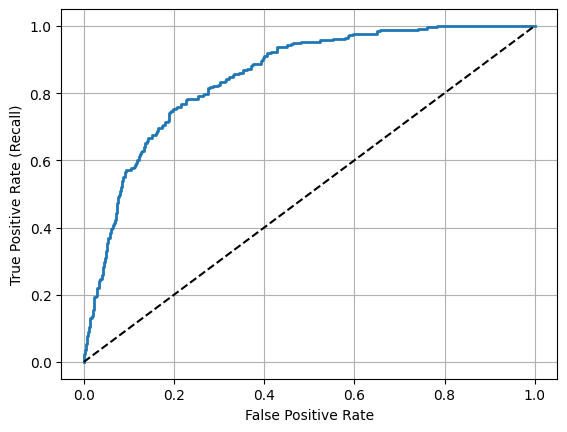

In [61]:
# Plotting the ROC curve
def plot_roc_curve (fpr, tpr, label = None):
    plt.plot(fpr, tpr, linewidth = 2, label = label)
    plt.plot([0,1], [0,1], 'k--') # Dashed diagonal
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.grid()
    
plot_roc_curve(fpr, tpr)
plt.show()

In [62]:
# Taking the test set and evaluating the model
model_1.evaluate(test_generator, steps=steps_test)

54/54 [==============================] - 8s 154ms/step - loss: 0.5332 - accuracy: 0.7231 - precision: 0.1831 - recall: 0.8127 - auc: 0.8503


[0.5331851840019226,
 0.7230902910232544,
 0.1831238716840744,
 0.8127490282058716,
 0.8503185510635376]

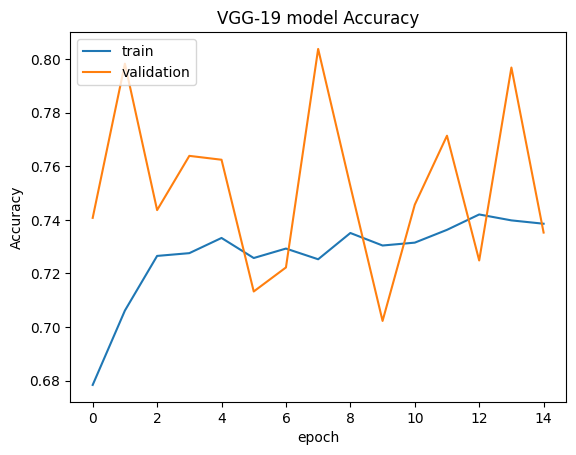

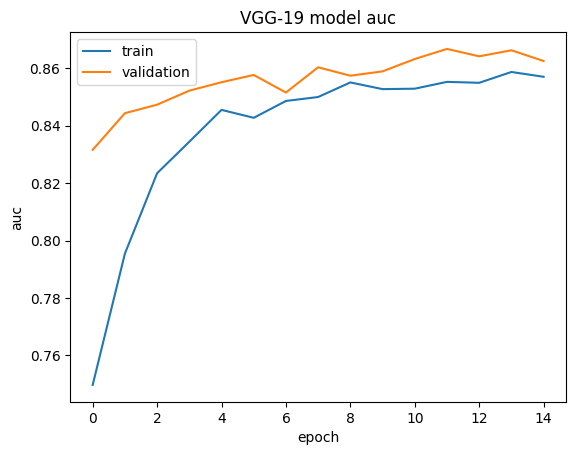

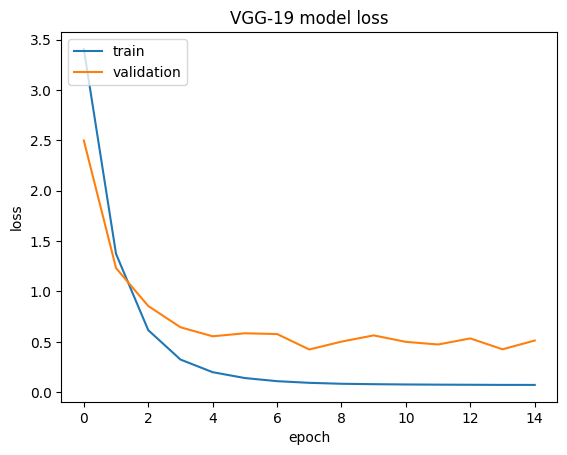

In [151]:
# Summarize history for accuracy
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('VGG-19 model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# Summarize history for AUC
plt.plot(history_1.history['auc'])
plt.plot(history_1.history['val_auc'])
plt.title('VGG-19 model auc')
plt.ylabel('auc')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# Summarize history for loss
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('VGG-19 model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [153]:
# y_pred is the array of predicted probabilities
y_pred_binary = (y_pred > 0.5).astype(int)

# Generate confusion matrix for the predictions
conf_matrix = confusion_matrix(y_test, y_pred_binary)
accuracy = accuracy_score(y_test, y_pred_binary)
roc_auc = roc_auc_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print("Confusion matrix: ", conf_matrix)
print("Accuracy: ", accuracy)
print("ROC-AUC: ", roc_auc)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-Score: ", f1)

Confusion matrix:  [[3213   42]
 [ 255    3]]
Accuracy:  0.9154568744662681
ROC-AUC:  0.4993623405851463
Precision:  0.06666666666666667
Recall:  0.011627906976744186
F1-Score:  0.0198019801980198


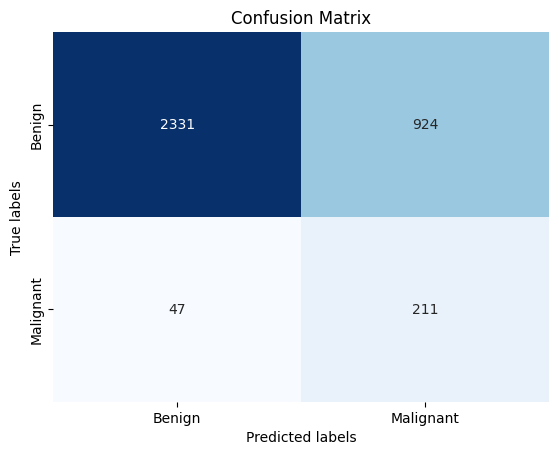

In [109]:
fig, ax = plt.subplots()

# Create a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', ax=ax, cmap='Blues', cbar=False)

# Set labels, title, and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(class_names)
ax.yaxis.set_ticklabels(class_names)

plt.show()

In [152]:
# Calculating the specificity
TN = conf_matrix[0,0]
FP = conf_matrix[0,1]

specificity = TN / (TN + FP)

print('Specificity : ', specificity)

Specificity :  0.9870967741935484


# Resnet50

In [79]:
from tensorflow.keras.applications.resnet50 import preprocess_input

train_data_gen2 = ImageDataGenerator(
      preprocessing_function=keras.applications.resnet50.preprocess_input
)

validation_data_gen2 = ImageDataGenerator(
     preprocessing_function=keras.applications.resnet50.preprocess_input
)

# Create a generator for training data
train_generator2 = train_data_gen2.flow_from_dataframe(
    df_train,    # Provide DataFrame here
    x_col='image_path',    # Column in df_train that contains the full path to each image
    y_col='target',    # Column in df_train that contains the labels
    target_size=(configs.img_size),
    batch_size=configs.batch_size,
    class_mode='binary',
    shuffle=True
)

# Create a generator for validation data
validation_generator2 = validation_data_gen2.flow_from_dataframe(
    df_val,    # Provide DataFrame here
    x_col='image_path',    # Column in df_val that contains the full path to each image
    y_col='target',    # Column in df_val that contains the labels
    target_size=(configs.img_size),
    batch_size=configs.batch_size,
    class_mode='binary',
    shuffle=True
)

Found 28100 validated image filenames belonging to 2 classes.
Found 3513 validated image filenames belonging to 2 classes.


In [80]:
steps_train2 = train_generator2.n // train_generator2.batch_size
steps_val2 = validation_generator2.n // validation_generator2.batch_size

In [81]:
base_model_2 = tf.keras.applications.resnet.ResNet50(
    include_top=False, weights='imagenet',input_shape=(224,224,3)
)

# freeze all layers in the base model
base_model_2.trainable = False

# un-freeze the BatchNorm layers
for layer in base_model_2.layers:
    if "BatchNormalization" in layer.__class__.__name__:
        layer.trainable = True

model_2=Sequential()
model_2.add(base_model_2)

model_2.add(Flatten())
model_2.add(Dense(1024,activation='relu',kernel_regularizer='l2'))
model_2.add(Dropout(0.3))
model_2.add(Dense(512,activation='relu',kernel_regularizer='l2'))
model_2.add(Dropout(0.3))
model_2.add(Dense(256,activation='relu',kernel_regularizer='l2'))
model_2.add(Dropout(0.3))
model_2.add(Dense(64,activation='relu',kernel_regularizer='l2'))
model_2.add(Dropout(0.3))
model_2.add(Dense(1,activation='sigmoid'))
            
model_2.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_6 (Flatten)         (None, 100352)            0         
                                                                 
 dense_29 (Dense)            (None, 1024)              102761472 
                                                                 
 dropout_19 (Dropout)        (None, 1024)              0         
                                                                 
 dense_30 (Dense)            (None, 512)               524800    
                                                                 
 dropout_20 (Dropout)        (None, 512)               0         
                                                                 
 dense_31 (Dense)            (None, 256)             

In [82]:
model_2.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=METRICS)

In [83]:
%%time
history_2 = model_2.fit(
          train_generator2,
          steps_per_epoch = train_generator2.samples // configs.batch_size,
          validation_data = validation_generator2, 
          validation_steps = validation_generator2.samples // configs.batch_size,
          epochs = configs.epochs,
          callbacks=callbacks
)

Epoch 1/15
439/439 [==============================] - 75s 164ms/step - loss: 16.0368 - accuracy: 0.8777 - precision: 0.2393 - recall: 0.3054 - auc: 0.7502 - val_loss: 8.2773 - val_accuracy: 0.9578 - val_precision: 0.8811 - val_recall: 0.4941 - val_auc: 0.9718
Epoch 2/15
439/439 [==============================] - 71s 163ms/step - loss: 5.7950 - accuracy: 0.9546 - precision: 0.7425 - recall: 0.5876 - auc: 0.9512 - val_loss: 4.0374 - val_accuracy: 0.9806 - val_precision: 0.9009 - val_recall: 0.8261 - val_auc: 0.9846
Epoch 3/15
439/439 [==============================] - 72s 163ms/step - loss: 3.1487 - accuracy: 0.9726 - precision: 0.8487 - recall: 0.7643 - auc: 0.9749 - val_loss: 2.3923 - val_accuracy: 0.9815 - val_precision: 0.8514 - val_recall: 0.9109 - val_auc: 0.9914
Epoch 4/15
439/439 [==============================] - 72s 164ms/step - loss: 1.9164 - accuracy: 0.9759 - precision: 0.8719 - recall: 0.7883 - auc: 0.9839 - val_loss: 1.4844 - val_accuracy: 0.9838 - val_precision: 0.8937 - 

In [84]:
model_2.save('C:/Users/MartinDesktop/Documents/Oslomet Master 1.2/ACIT4630/JupyterNotebook/all_models/model2.h5')

In [85]:
# Creating a test generator for test data
test_datagen2 = ImageDataGenerator(
    preprocessing_function=preprocess_input,
)

test_generator2 = test_datagen2.flow_from_dataframe(
    df_test,    # Provide DataFrame here
    x_col='image_path',    # Column in df_val that contains the full path to each image
    y_col='target',    # Column in df_val that contains the labels
    target_size=(configs.img_size),
    batch_size=configs.batch_size,
    class_mode='binary',
    shuffle=True
)

Found 3513 validated image filenames belonging to 2 classes.


In [86]:
# Taking the validation set and evaluating the model
model_2.evaluate(validation_generator2, steps=steps_val2)

54/54 [==============================] - 6s 116ms/step - loss: 0.1492 - accuracy: 0.9942 - precision: 0.9722 - recall: 0.9496 - auc: 0.9925


[0.1492462307214737,
 0.9942129850387573,
 0.9722222089767456,
 0.9496123790740967,
 0.9925370812416077]

In [87]:
steps_test2 = test_generator2.n // test_generator2.batch_size

In [88]:
test_examples2 = test_generator2.n

In [89]:
# Getting the classes of the test dataset
y_test2 = np.array([])
num_batches = 0
for _, y in test_generator2:
    y_test2 = np.append(y_test2, y)
    num_batches += 1
    if num_batches == math.ceil(test_examples2 / configs.batch_size):
        break
y_test2

array([0., 0., 0., ..., 0., 0., 0.])

In [90]:
# Predicting output on the test set
y_pred2 = model_2.predict(test_generator2).round()
y_pred2

55/55 [==============================] - 7s 112ms/step


array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [91]:
# Computing the TPR and FPR values from the roc curve
fpr, tpr, thresholds = roc_curve(y_test2, y_pred2)

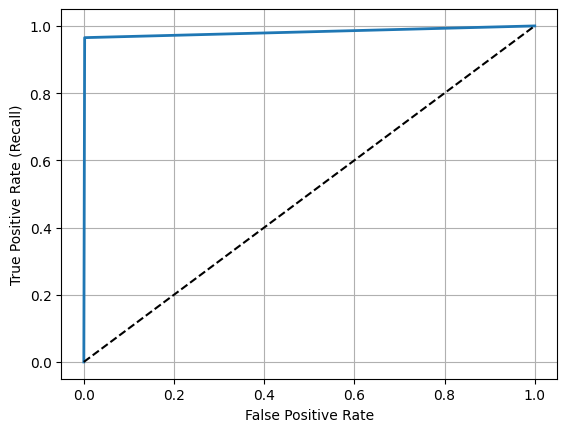

In [92]:
# Plotting the ROC curve
def plot_roc_curve (fpr, tpr, label = None):
    plt.plot(fpr, tpr, linewidth = 2, label = label)
    plt.plot([0,1], [0,1], 'k--') # Dashed diagonal
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.grid()
    
plot_roc_curve(fpr, tpr)
plt.show()

In [93]:
# Taking the test set and evaluating the model
model_2.evaluate(test_generator2, steps=steps_test2)

54/54 [==============================] - 6s 116ms/step - loss: 0.1479 - accuracy: 0.9957 - precision: 0.9763 - recall: 0.9648 - auc: 0.9907


[0.14786332845687866,
 0.9956597089767456,
 0.9762845635414124,
 0.96484375,
 0.990663468837738]

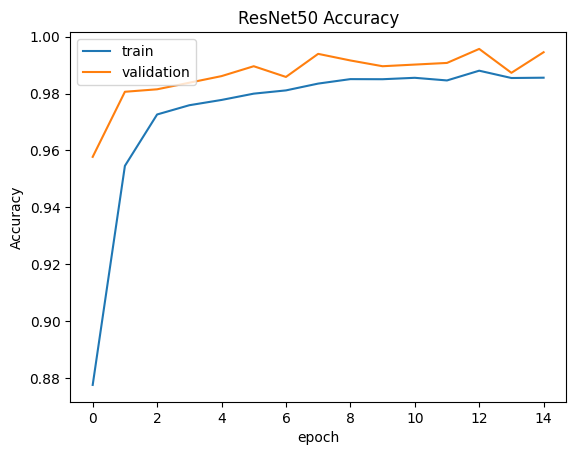

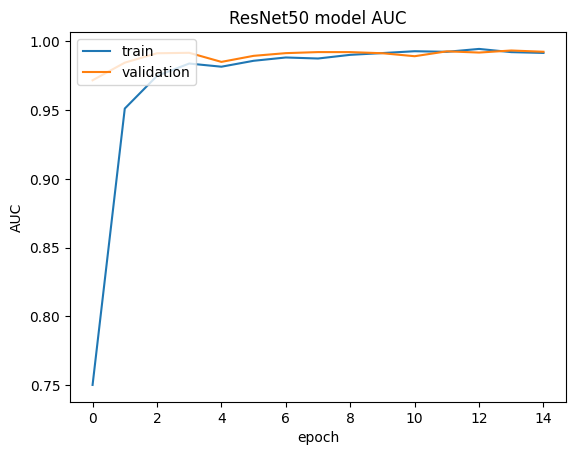

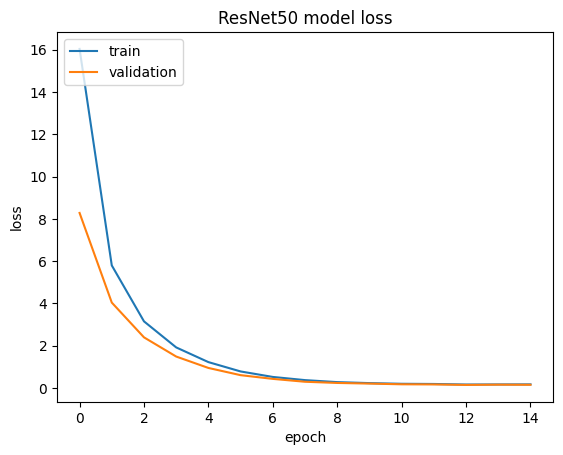

In [94]:
import matplotlib.pyplot as plt
# Summarize history for accuracy
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('ResNet50 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# Summarize history for AUC
plt.plot(history_2.history['auc'])
plt.plot(history_2.history['val_auc'])
plt.title('ResNet50 model AUC')
plt.ylabel('AUC')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('ResNet50 model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [154]:
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

# y_pred is the array of predicted probabilities
y_pred_binary2 = (y_pred2 > 0.5).astype(int)

# Generate confusion matrix for the predictions
conf_matrix2 = confusion_matrix(y_test2, y_pred_binary2)
accuracy2 = accuracy_score(y_test2, y_pred_binary2)
roc_auc2 = roc_auc_score(y_test2, y_pred_binary2)
precision2 = precision_score(y_test2, y_pred_binary2)
recall2 = recall_score(y_test2, y_pred_binary2)
f12 = f1_score(y_test2, y_pred_binary2)

print("Confusion matrix: ", conf_matrix2)
print("Accuracy: ", accuracy2)
print("ROC-AUC: ", roc_auc2)
print("Precision: ", precision2)
print("Recall: ", recall2)
print("F1-Score: ", f12)

Confusion matrix:  [[3249    6]
 [   9  249]]
Accuracy:  0.9957301451750641
ROC-AUC:  0.9816364805487084
Precision:  0.9764705882352941
Recall:  0.9651162790697675
F1-Score:  0.9707602339181286


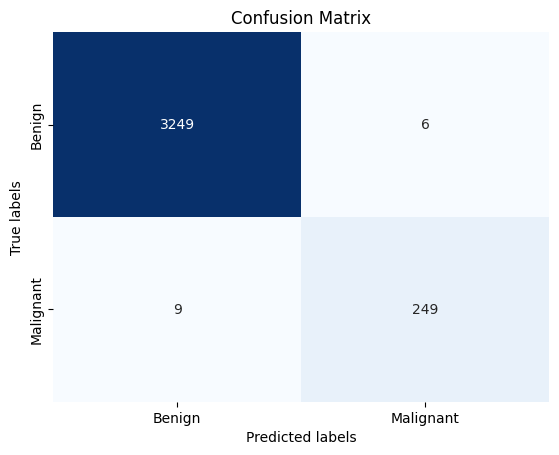

In [104]:
fig, ax = plt.subplots()

# Create a heatmap
sns.heatmap(conf_matrix2, annot=True, fmt='d', ax=ax, cmap='Blues', cbar=False)

# Set labels, title, and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(class_names)
ax.yaxis.set_ticklabels(class_names)

plt.show()

In [96]:
# Calculating the specificity
TN = conf_matrix2[0,0]
FP = conf_matrix2[0,1]

specificity2 = TN / (TN + FP)

print('Specificity : ', specificity2)

Specificity :  0.9981566820276497


# MobileNetV2

In [13]:
from tensorflow.keras.applications.mobilenet_v2 import *

train_data_gen3 = ImageDataGenerator(
      preprocessing_function=preprocess_input
)

validation_data_gen3 = ImageDataGenerator(
      preprocessing_function=keras.applications.mobilenet_v2.preprocess_input
)

# Create a generator for training data
train_generator3 = train_data_gen3.flow_from_dataframe(
    df_train,    # Provide DataFrame here
    x_col='image_path',    # Column in df_train that contains the full path to each image
    y_col='target',    # Column in df_train that contains the labels
    target_size=(configs.img_size),
    batch_size=configs.batch_size,
    class_mode='binary',
    shuffle=True
)

# Create a generator for validation data
validation_generator3 = validation_data_gen3.flow_from_dataframe(
    df_val,    # Provide DataFrame here
    x_col='image_path',    # Column in df_val that contains the full path to each image
    y_col='target',    # Column in df_val that contains the labels
    target_size=(configs.img_size),
    batch_size=configs.batch_size,
    class_mode='binary',
    shuffle=True
)


Found 28100 validated image filenames belonging to 2 classes.
Found 3513 validated image filenames belonging to 2 classes.


In [14]:
steps_train3 = train_generator3.n // train_generator3.batch_size
steps_val3 = validation_generator3.n // validation_generator3.batch_size

In [24]:
base_model_3= MobileNetV2(include_top=False, weights='imagenet',
                                        input_tensor=None, input_shape=(224,224,3))
for each_layer in base_model_3.layers:
        each_layer.trainable=False

model_3=Sequential()
model_3.add(base_model_3)

model_3.add(Flatten())
model_3.add(Dense(256,activation='relu',kernel_regularizer='l2'))
model_3.add(Dropout(0.4))
model_3.add(Dense(128,activation='relu',kernel_regularizer='l2'))
model_3.add(Dropout(0.3))
model_3.add(Dense(1,activation='sigmoid'))
            
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_3 (Flatten)         (None, 62720)             0         
                                                                 
 dense_10 (Dense)            (None, 256)               16056576  
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 128)               32896     
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                      

In [25]:
model_3.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=METRICS)

In [26]:
%%time
history_3 = model_3.fit(
          train_generator3,
          steps_per_epoch = train_generator3.samples // configs.batch_size,
          validation_data = validation_generator3, 
          validation_steps = validation_generator3.samples // configs.batch_size,
          epochs = configs.epochs,
          class_weight=class_weights,
          callbacks=callbacks
)

Epoch 1/15
439/439 [==============================] - 34s 73ms/step - loss: 2.5111 - accuracy: 0.7496 - precision: 0.1939 - recall: 0.7626 - auc: 0.8338 - val_loss: 1.4064 - val_accuracy: 0.8947 - val_precision: 0.3913 - val_recall: 0.7795 - val_auc: 0.9376
Epoch 2/15
439/439 [==============================] - 41s 93ms/step - loss: 0.7974 - accuracy: 0.8038 - precision: 0.2516 - recall: 0.8461 - auc: 0.9040 - val_loss: 0.7557 - val_accuracy: 0.8686 - val_precision: 0.3478 - val_recall: 0.9243 - val_auc: 0.9648
Epoch 3/15
439/439 [==============================] - 219s 500ms/step - loss: 0.3717 - accuracy: 0.8389 - precision: 0.2973 - recall: 0.8720 - auc: 0.9325 - val_loss: 0.4944 - val_accuracy: 0.8999 - val_precision: 0.4214 - val_recall: 0.9147 - val_auc: 0.9689
Epoch 4/15
439/439 [==============================] - 33s 75ms/step - loss: 0.2067 - accuracy: 0.8562 - precision: 0.3250 - recall: 0.8866 - auc: 0.9454 - val_loss: 0.3877 - val_accuracy: 0.8802 - val_precision: 0.3744 - val

In [27]:
model_3.save('C:/Users/MartinDesktop/Documents/Oslomet Master 1.2/ACIT4630/JupyterNotebook/all_models/model3.h5')

In [28]:
# Taking the validation set and evaluating the model
model_3.evaluate(validation_generator3, steps=steps_val3)

54/54 [==============================] - 3s 58ms/step - loss: 0.1951 - accuracy: 0.9285 - precision: 0.5053 - recall: 0.9524 - auc: 0.9879


[0.19512251019477844,
 0.9285300970077515,
 0.5052631497383118,
 0.9523809552192688,
 0.987916886806488]

In [29]:
# Creating a test generator for test data
test_datagen3 = ImageDataGenerator(
    preprocessing_function=preprocess_input,
)

test_generator3 = test_datagen3.flow_from_dataframe(
    df_test,    # Provide DataFrame here
    x_col='image_path',    # Column in df_val that contains the full path to each image
    y_col='target',    # Column in df_val that contains the labels
    target_size=(configs.img_size),
    batch_size=configs.batch_size,
    class_mode='binary',
    shuffle=True
)

Found 3513 validated image filenames belonging to 2 classes.


In [30]:
steps_test3 = test_generator3.n // test_generator3.batch_size

In [31]:
test_examples3 = test_generator3.n

In [33]:
# Getting the classes of the test dataset
y_test3 = np.array([])
num_batches = 0
for _, y in test_generator3:
    y_test3 = np.append(y_test3, y)
    num_batches += 1
    if num_batches == math.ceil(test_examples3 / configs.batch_size):
        break
y_test3

array([0., 0., 0., ..., 1., 0., 0.])

In [34]:
# Predicting output on the test set
y_pred3 = model_3.predict(test_generator3)
y_pred3

55/55 [==============================] - 4s 65ms/step


array([[5.3751748e-02],
       [3.7624285e-02],
       [7.6096901e-04],
       ...,
       [9.7711277e-01],
       [5.4726493e-01],
       [5.0742100e-03]], dtype=float32)

In [35]:
# Computing the TPR and FPR values from the roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test3, y_pred3)

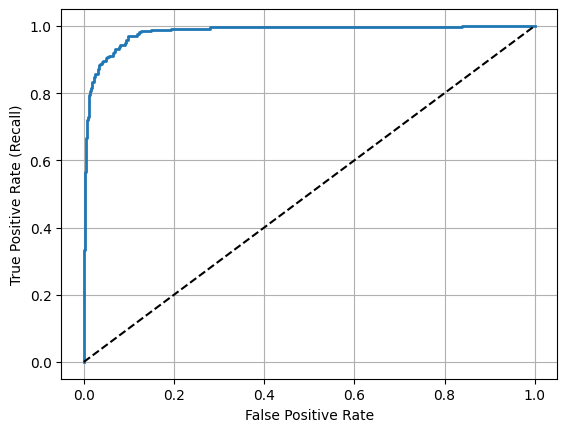

In [36]:
import matplotlib.pyplot as plt
# Plotting the ROC curve
def plot_roc_curve (fpr, tpr, label = None):
    plt.plot(fpr, tpr, linewidth = 2, label = label)
    plt.plot([0,1], [0,1], 'k--') # Dashed diagonal
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.grid()
    
plot_roc_curve(fpr, tpr)
plt.show()

In [37]:
# Taking the test set and evaluating the model
model_3.evaluate(test_generator3, steps=steps_test3)

54/54 [==============================] - 3s 58ms/step - loss: 0.2208 - accuracy: 0.9109 - precision: 0.4492 - recall: 0.9409 - auc: 0.9820


[0.22079041600227356,
 0.9108796119689941,
 0.44924813508987427,
 0.9409449100494385,
 0.9819538593292236]

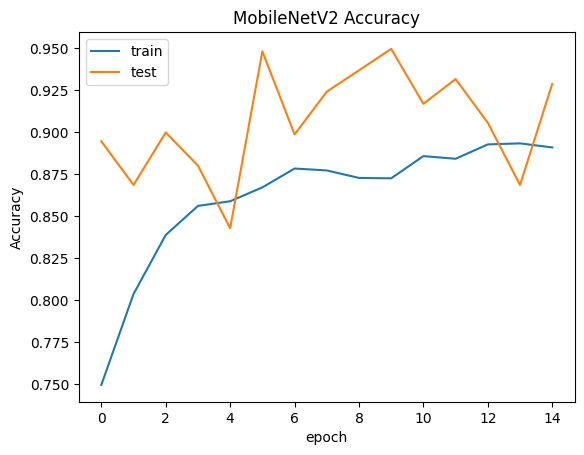

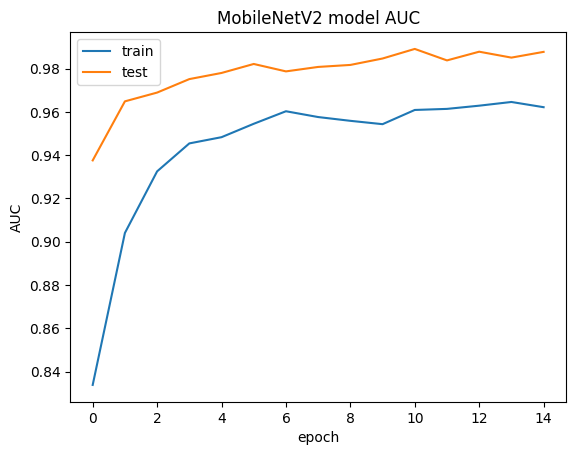

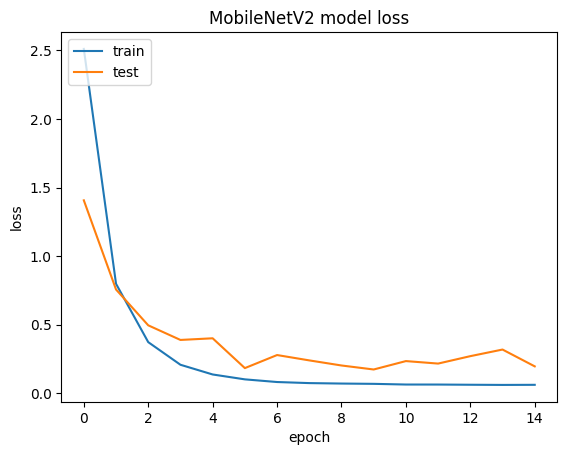

In [38]:
import matplotlib.pyplot as plt
# Summarize history for accuracy
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('MobileNetV2 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# Summarize history for AUC
plt.plot(history_3.history['auc'])
plt.plot(history_3.history['val_auc'])
plt.title('MobileNetV2 model AUC')
plt.ylabel('AUC')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('MobileNetV2 model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [155]:
# y_pred is the array of predicted probabilities
y_pred_binary3 = (y_pred3 > 0.5).astype(int)

# Generate confusion matrix for the predictions
conf_matrix3 = confusion_matrix(y_test3, y_pred_binary3)
accuracy3 = accuracy_score(y_test3, y_pred_binary3)
roc_auc3 = roc_auc_score(y_test3, y_pred_binary3)
precision3 = precision_score(y_test3, y_pred_binary3)
recall3 = recall_score(y_test3, y_pred_binary3)
f13 = f1_score(y_test3, y_pred_binary3)

print("Confusion matrix: ", conf_matrix3)
print("Accuracy: ", accuracy3)
print("ROC-AUC: ", roc_auc3)
print("Precision: ", precision3)
print("Recall: ", recall3)
print("F1-Score: ", f13)

Confusion matrix:  [[2957  298]
 [  15  243]]
Accuracy:  0.9109023626530032
ROC-AUC:  0.9251545029114421
Precision:  0.4491682070240296
Recall:  0.9418604651162791
F1-Score:  0.6082603254067585


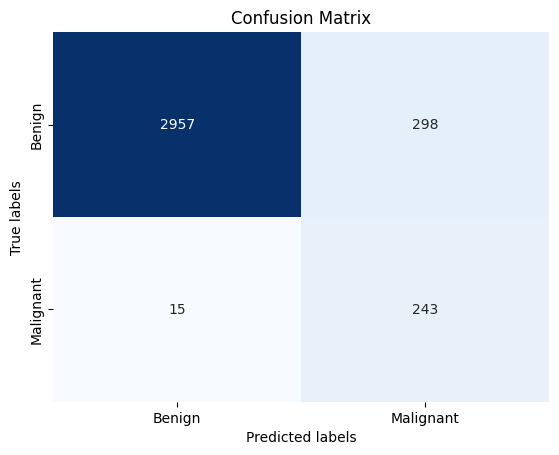

In [107]:
fig, ax = plt.subplots()

# Create a heatmap
sns.heatmap(conf_matrix3, annot=True, fmt='d', ax=ax, cmap='Blues', cbar=False)

# Set labels, title, and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(class_names)
ax.yaxis.set_ticklabels(class_names)

plt.show()

In [302]:
# Calculating the specificity
TN = conf_matrix3[0,0]
FP = conf_matrix3[0,1]

specificity3 = TN / (TN + FP)

print('Specificity : ', specificity3)

Specificity :  0.919815668202765


In [ ]:
preds_vgg16 = model_1.predict(test_generator)
preds_resnet50 = model_2.predict(test_generator2)
preds_mobilenetv2 = model_3.predict(test_generator3)

# Ensembling Models

In [179]:
train_data_gen4 = ImageDataGenerator(
      rescale=1./255
)

validation_data_gen4 = ImageDataGenerator(
      rescale=1./255
)

# Create a generator for training data
train_generator4 = train_data_gen4.flow_from_dataframe(
    df_train,    # Provide DataFrame here
    x_col='image_path',    # Column in df_train that contains the full path to each image
    y_col='target',    # Column in df_train that contains the labels
    target_size=(configs.img_size),
    batch_size=configs.batch_size,
    class_mode='binary',
    shuffle=True
)

# Create a generator for validation data
validation_generator4 = validation_data_gen4.flow_from_dataframe(
    df_val,    # Provide DataFrame here
    x_col='image_path',    # Column in df_val that contains the full path to each image
    y_col='target',    # Column in df_val that contains the labels
    target_size=(configs.img_size),
    batch_size=configs.batch_size,
    class_mode='binary',
    shuffle=True
)

test_datagen4 = ImageDataGenerator(
      rescale=1./255
)

test_generator4 = test_datagen4.flow_from_dataframe(
    df_test,    # Provide DataFrame here
    x_col='image_path',    # Column in df_val that contains the full path to each image
    y_col='target',    # Column in df_val that contains the labels
    target_size=(configs.img_size),
    batch_size=configs.batch_size,
    class_mode='binary',
    shuffle=False
)

Found 28100 validated image filenames belonging to 2 classes.
Found 3513 validated image filenames belonging to 2 classes.
Found 3513 validated image filenames belonging to 2 classes.


In [200]:
train_data_gen4 = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

validation_data_gen4 = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

# Create a generator for training data
train_generator4 = train_data_gen4.flow_from_dataframe(
    df_train,    # Provide DataFrame here
    x_col='image_path',    # Column in df_train that contains the full path to each image
    y_col='target',    # Column in df_train that contains the labels
    target_size=(configs.img_size),
    batch_size=configs.batch_size,
    class_mode='binary',
    shuffle=True
)

# Create a generator for validation data
validation_generator4 = validation_data_gen4.flow_from_dataframe(
    df_val,    # Provide DataFrame here
    x_col='image_path',    # Column in df_val that contains the full path to each image
    y_col='target',    # Column in df_val that contains the labels
    target_size=(configs.img_size),
    batch_size=configs.batch_size,
    class_mode='binary',
    shuffle=True
)

test_datagen4 = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

test_generator4 = test_datagen4.flow_from_dataframe(
    df_test,    # Provide DataFrame here
    x_col='image_path',    # Column in df_val that contains the full path to each image
    y_col='target',    # Column in df_val that contains the labels
    target_size=(configs.img_size),
    batch_size=configs.batch_size,
    class_mode='binary',
    shuffle=False
)

Found 28100 validated image filenames belonging to 2 classes.
Found 3513 validated image filenames belonging to 2 classes.
Found 3513 validated image filenames belonging to 2 classes.


In [204]:

vgg16 = KerasMember(name="vgg16", keras_model=model_1, train_batches=train_generator4, val_batches=validation_generator4)
resnet50 = KerasMember(name="resnet50", keras_model=model_2, train_batches=train_generator4, val_batches=validation_generator4)
mobilenetv2 = KerasMember(name="mobilenetv2", keras_model=model_3, train_batches=train_generator4, val_batches=validation_generator4)

55/55 [==============================] - 3s 63ms/step


In [201]:
from deepstack.base import KerasMember
vgg19_feature = Model(inputs=model_1.input, outputs=model_1.get_layer('global_average_pooling2d_3').output)
vgg19 = KerasMember(name="vgg19", keras_model=vgg19_feature, train_batches=train_generator4, val_batches=validation_generator4)

resnet50_feature = Model(inputs=model_2.input, outputs=model_2.get_layer('dense_29').output)
resnet50 = KerasMember(name="resnet50", keras_model=resnet50_feature, train_batches=train_generator4, val_batches=validation_generator4)

mobilenetv2_feature = Model(inputs=model_3.input, outputs=model_3.get_layer('dense_10').output)
mobilenetv2 = KerasMember(name="mobilenetv2", keras_model=mobilenetv2_feature, train_batches=train_generator4, val_batches=validation_generator4)


C:\Users\MartinDesktop\anaconda3\envs\tf_gpu\lib\site-packages\deepstack\base.py:147: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  return self.model.predict_generator(


55/55 [==============================] - 4s 65ms/step


In [205]:
from deepstack.ensemble import StackEnsemble
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

stack = StackEnsemble()

# 2nd Level Meta-Learner
estimators = [
    ('rf', RandomForestClassifier(verbose=0, n_estimators=100, max_depth=15, n_jobs=20, min_samples_split=30)),
    ('etr', ExtraTreesClassifier(verbose=0, n_estimators=100, max_depth=10, n_jobs=20, min_samples_split=20)),
    ('dtc',DecisionTreeClassifier(random_state=0, max_depth=3))
]
# 3rd Level Meta-Learner
clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

stack.model = clf
stack.add_members([vgg16, resnet50, mobilenetv2])
f = stack.fit()
stack.save()

<StackEnsemble: [vgg16, resnet50, mobilenetv2]>

In [206]:
#print("Confusion Matrix",stack.describe(metric=sklearn.metrics.confusion_matrix))
print("Accuracy",stack.describe(metric=sklearn.metrics.accuracy_score))
print("")
print("AUC",stack.describe(metric=sklearn.metrics.roc_auc_score))
print("")
print("Precision",stack.describe(metric=sklearn.metrics.precision_score))
print("")
print("Recall",stack.describe(metric=sklearn.metrics.recall_score))
print("")
print("F1 Score",stack.describe(metric=sklearn.metrics.f1_score))

Calling predict
vgg16 - accuracy_score: 0.1375
resnet50 - accuracy_score: 0.0064
mobilenetv2 - accuracy_score: 0.3581
StackEnsemble accuracy_score: 0.9940
Accuracy 0.9940222032450897

Calling predict
vgg16 - roc_auc_score: 0.8625
resnet50 - roc_auc_score: 0.9936
mobilenetv2 - roc_auc_score: 0.6419
StackEnsemble roc_auc_score: 0.9843
AUC 0.9843352879615941

Calling predict
vgg16 - precision_score: 0.1375
resnet50 - precision_score: 0.0064
mobilenetv2 - precision_score: 0.3581
StackEnsemble precision_score: 0.9474
Precision 0.9473684210526315

Calling predict
vgg16 - recall_score: 0.1375
resnet50 - recall_score: 0.0064
mobilenetv2 - recall_score: 0.3581
StackEnsemble recall_score: 0.9730
Recall 0.972972972972973

Calling predict
vgg16 - f1_score: 0.1375
resnet50 - f1_score: 0.0064
mobilenetv2 - f1_score: 0.3581
StackEnsemble f1_score: 0.9600
F1 Score 0.9599999999999999
